In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)

df=pd.read_excel("input_data.xlsx")
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
convert_dict={"Short description":str,
              "Decription":str,
              'Caller':str,
              "Assignment group":str}

In [ ]:
df=df.astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   Description        8500 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
df["RawDescription"]=df["Short description"].str.cat(df["Description"],sep=' ',na_rep=' ')
df.head()

,Short description,Description,Caller,Assignment group,RawDescription
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


In [ ]:
df["RawWordCount"]=[len(desc.split(' ')) for desc in df["RawDescription"]]
df.head()

,Short description,Description,Caller,Assignment group,RawDescription,RawWordCount
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,24
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,14
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6


In [ ]:
wordCount_before=df["RawWordCount"].sum()

In [ ]:
wordCount_before

307607

In [ ]:
font={"family":"serif","color":"darkred","weight":"normal","size":16}


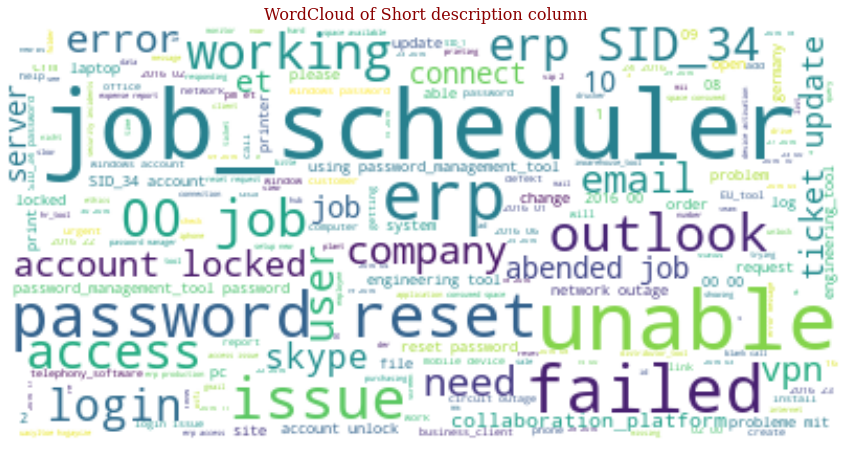

In [ ]:
All_words=""
All_words+=" ".join(df["Short description"])
wordcloud=WordCloud(background_color="white",include_numbers=True).generate(All_words)
plt.figure(figsize=(15,15))
plt.title("WordCloud of Short description column",fontdict=font)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


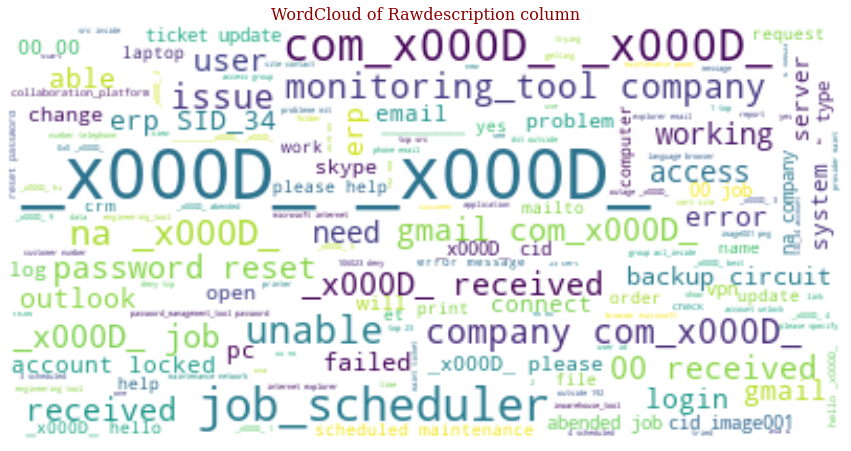

In [ ]:
All_words=""
All_words+=" ".join(df["RawDescription"])
wordcloud=WordCloud(background_color="white",include_numbers=True).generate(All_words)
plt.figure(figsize=(15,15))
plt.title("WordCloud of Rawdescription column",fontdict=font)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


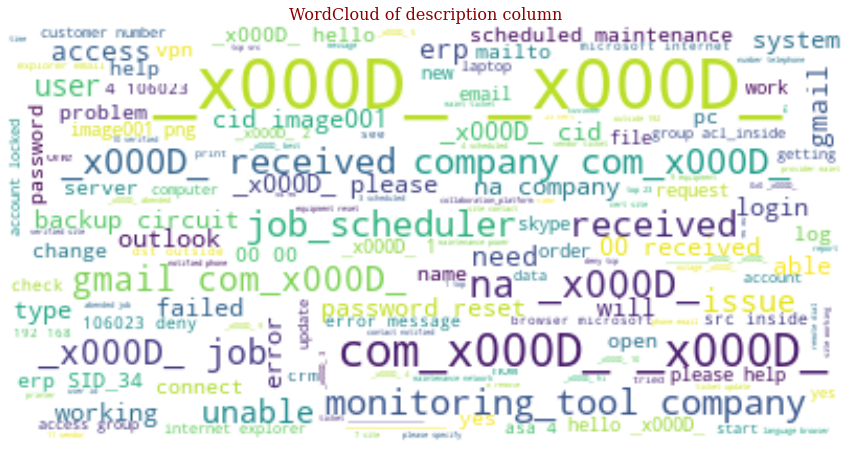

In [ ]:
All_words=""
All_words+=" ".join(df["Description"])
wordcloud=WordCloud(background_color="white",include_numbers=True).generate(All_words)
plt.figure(figsize=(15,15))
plt.title("WordCloud of description column",fontdict=font)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


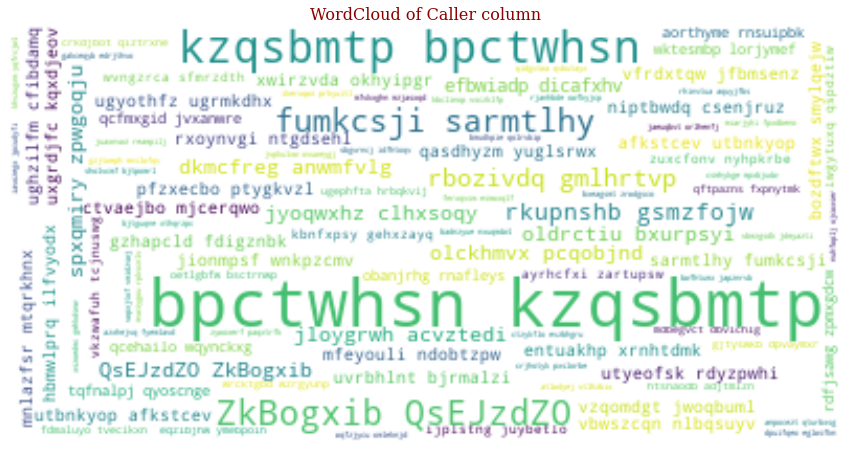

In [ ]:
All_caller=""
All_caller+=" ".join(df["Caller"])
wordcloud=WordCloud(background_color="white",include_numbers=True).generate(All_caller)
plt.figure(figsize=(15,15))
plt.title("WordCloud of Caller column",fontdict=font)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


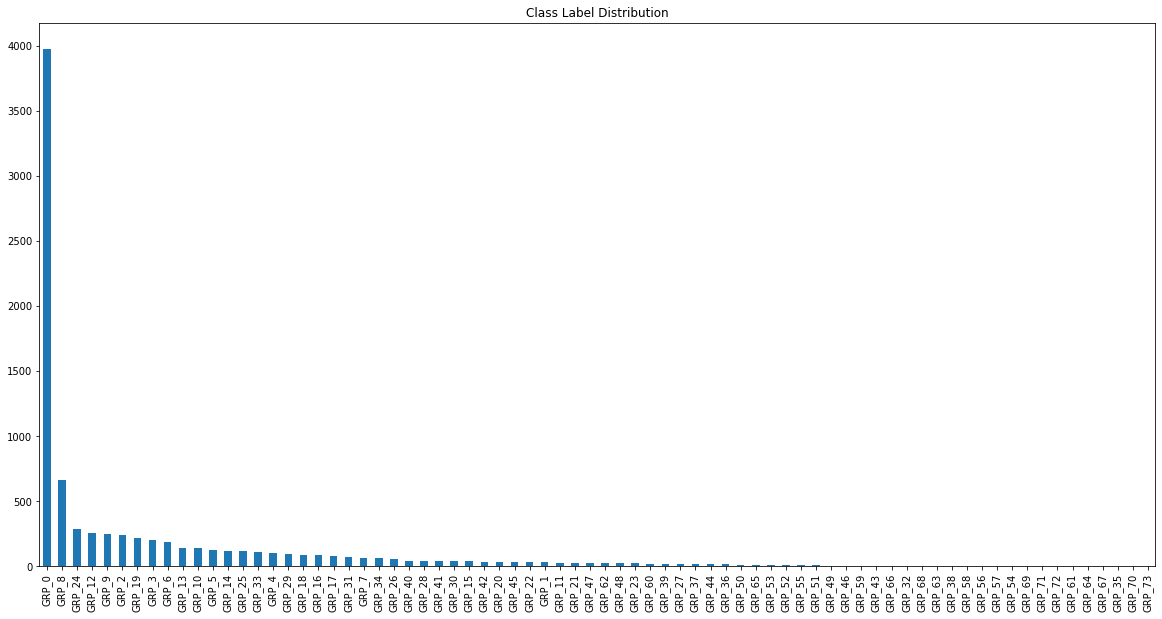

In [ ]:
df["Assignment group"].value_counts().plot(kind="bar",figsize=(20,10),title="Class Label Distribution")

In [ ]:
wordcloud.to_file("first_review.png")

In [ ]:
def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')


In [ ]:
def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = removeString(dataset[column], regex)
    return dataset

In [ ]:
def getRegexList():
    '''
    Adding regex list as per the given data set to flush off the unnecessary text
    
    '''
    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['received from:(.*)\r\n']  # received data line
    regexList += ['received']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['(.*)infection']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['https?:[^\]\n\r]+']  # https & http
    regexList += ['Subject:']
    regexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails are not required
    regexList += ['[0-9][\-0–90-9 ]+']  # phones are not required
    regexList += ['[0-9]']  # numbers not needed
    regexList += ['[^a-zA-z 0-9]+']  # anything that is not a letter
    regexList += ['[\r\n]']  # \r\n
    regexList += [' [a-zA-Z] ']  # single letters makes no sense
    regexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words makes no sense
    regexList += ["  "]  # double spaces
    
    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['Subject:']
    regexList += ['[^a-zA-Z]']

    return regexList

In [ ]:
df['CleanDescription'] = df['RawDescription']
# Select columns for cleaning
columnsToClean = ['CleanDescription']

# Create list of regex to remove sensitive data
# Clean dataset and remove sensitive data
clean_tickets_df = cleanDataset(df, columnsToClean, getRegexList())

<ipython-input-19-fe5b5c3ea340>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  return data.str.lower().str.replace(regex.lower(), ' ')


In [ ]:
clean_tickets_df.shape

(8500, 7)

In [ ]:
clean_tickets_df.head(10)

,Short description,Description,Caller,Assignment group,RawDescription,RawWordCount,CleanDescription
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verified user details employee ma...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,24,outlook d d from d hello team d d meetings s...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,14,cant log to vpn d d from d d d cannot log to...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access tool page unable access tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6,skype error skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,18,unable log to engineering tool and skype unabl...
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event: critical:HostName_221.company.com the v...,21,event critical hostname company com the value...
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket_no1550391- employment status - new non-...,18,ticket employment status new non employee ent...
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,14,unable disable add ins outlook unable disable ...
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_874773 ticket update ...,8,ticket update inplant ticket update inplant


In [ ]:
import re
import nltk 
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
 

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words=set(stopwords.words("english"))


In [ ]:
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
preprocessed_all_documents=list()

In [ ]:
for desc in clean_tickets_df["CleanDescription"]:
  word_tokens=word_tokenize(desc)

  filter_sentence=[]
  for w in word_tokens:
    if w not in stop_words:
      filter_sentence.append(w)
  lemma_word=[]
  wordnet_lemmatizer=WordNetLemmatizer()
  for w in filter_sentence:
    word1=wordnet_lemmatizer.lemmatize(w,pos="n")
    word2=wordnet_lemmatizer.lemmatize(word1,pos="v")
    word3=wordnet_lemmatizer.lemmatize(word2,pos="a")
    lemma_word.append(word3)
  words=' '.join(lemma_word)
  preprocessed_all_documents.append(words)

len(preprocessed_all_documents)


8500

In [ ]:
df.head()

,Short description,Description,Caller,Assignment group,RawDescription,RawWordCount,CleanDescription
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verified user details employee ma...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,24,outlook d d from d hello team d d meetings s...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,14,cant log to vpn d d from d d d cannot log to...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access tool page unable access tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6,skype error skype error


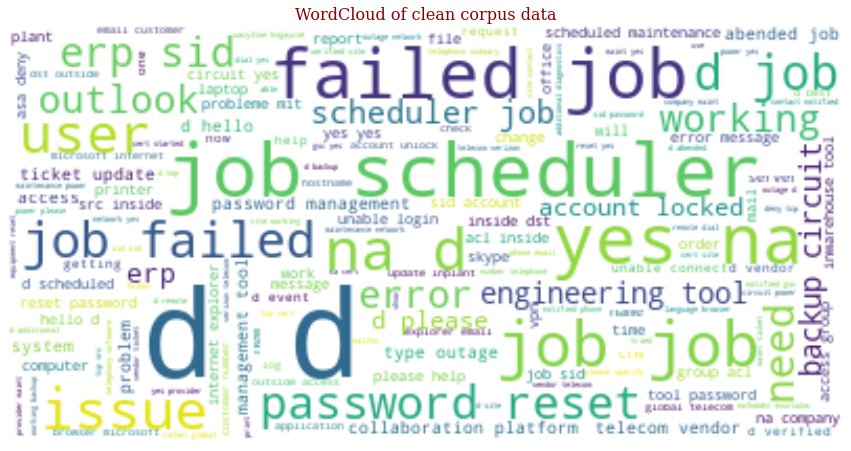

In [ ]:
All_words=""
All_words+=" ".join(df["CleanDescription"])
wordcloud=WordCloud(background_color="white",include_numbers=True).generate(All_words)
plt.figure(figsize=(15,15))
plt.title("WordCloud of clean corpus data",fontdict=font)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
group_frequency=dict(clean_tickets_df["Assignment group"].value_counts())


In [ ]:
group_df=pd.DataFrame.from_dict(group_frequency,orient="index",columns=["frequency"])
group_df["percent representation"]=group_df["frequency"]/group_df["frequency"].sum()
group_df["cummulative percentage"]=group_df["percent representation"].cumsum(axis=0)
group_df.head(35)

,frequency,percent representation,cummulative percentage
GRP_0,3976,0.467765,0.467765
GRP_8,661,0.077765,0.545529
GRP_24,289,0.034000,0.579529
GRP_12,257,0.030235,0.609765
GRP_9,252,0.029647,0.639412
GRP_2,241,0.028353,0.667765
GRP_19,215,0.025294,0.693059
GRP_3,200,0.023529,0.716588
GRP_6,184,0.021647,0.738235
GRP_13,145,0.017059,0.755294


In [ ]:
group_frequency_filtered=dict(filter(lambda x: x[1] >31, group_frequency.items()))
group_frequency_filtered


{'GRP_0': 3976,
 'GRP_8': 661,
 'GRP_24': 289,
 'GRP_12': 257,
 'GRP_9': 252,
 'GRP_2': 241,
 'GRP_19': 215,
 'GRP_3': 200,
 'GRP_6': 184,
 'GRP_13': 145,
 'GRP_10': 140,
 'GRP_5': 129,
 'GRP_14': 118,
 'GRP_25': 116,
 'GRP_33': 107,
 'GRP_4': 100,
 'GRP_29': 97,
 'GRP_18': 88,
 'GRP_16': 85,
 'GRP_17': 81,
 'GRP_31': 69,
 'GRP_7': 68,
 'GRP_34': 62,
 'GRP_26': 56,
 'GRP_40': 45,
 'GRP_28': 44,
 'GRP_41': 40,
 'GRP_30': 39,
 'GRP_15': 39,
 'GRP_42': 37,
 'GRP_20': 36,
 'GRP_45': 35}

In [ ]:
valid_grp_list=list(group_frequency_filtered)
clean_tickets_df=clean_tickets_df[clean_tickets_df["Assignment group"].isin(valid_grp_list)]
clean_tickets_df.head(10)

,Short description,Description,Caller,Assignment group,RawDescription,RawWordCount,CleanDescription
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verified user details employee ma...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,24,outlook d d from d hello team d d meetings s...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,14,cant log to vpn d d from d d d cannot log to...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access tool page unable access tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6,skype error skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,18,unable log to engineering tool and skype unabl...
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket_no1550391- employment status - new non-...,18,ticket employment status new non employee ent...
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,14,unable disable add ins outlook unable disable ...
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_874773 ticket update ...,8,ticket update inplant ticket update inplant
10,engineering tool says not connected and unable...,engineering tool says not connected and unable...,badgknqs xwelumfz,GRP_0,engineering tool says not connected and unable...,20,engineering tool says not connected and unable...


In [ ]:
clean_tickets_df["Assignment group"].value_counts().sum()

8051

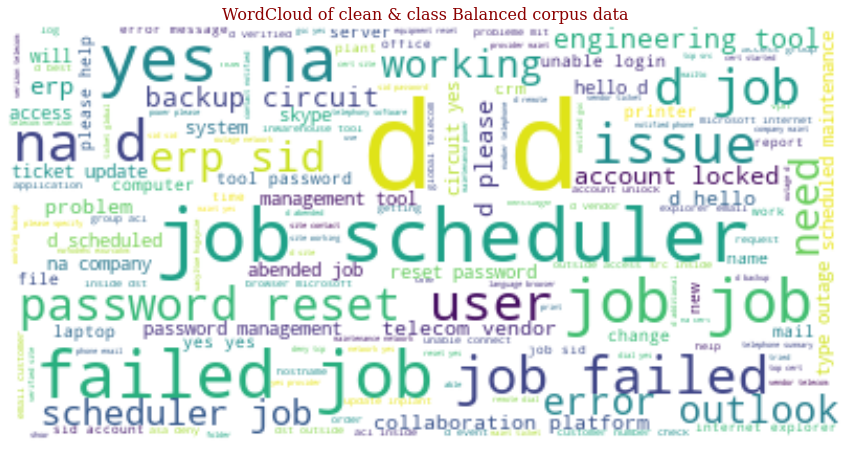

In [ ]:
All_words=""
All_words+=" ".join(df["CleanDescription"])
wordcloud=WordCloud(background_color="white",include_numbers=True).generate(All_words)
plt.figure(figsize=(15,15))
plt.title("WordCloud of clean & class Balanced corpus data",fontdict=font)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
le=preprocessing.LabelEncoder()
clean_tickets_df["LabelEncodings"]=le.fit_transform(clean_tickets_df["Assignment group"])
y_classes_len=len(le.classes_)
le.classes_
print(y_classes_len)

32


<ipython-input-39-a3b4d2dcb1b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tickets_df["LabelEncodings"]=le.fit_transform(clean_tickets_df["Assignment group"])


In [ ]:
clean_tickets_df.head(10)

,Short description,Description,Caller,Assignment group,RawDescription,RawWordCount,CleanDescription,LabelEncodings
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verified user details employee ma...,0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,24,outlook d d from d hello team d d meetings s...,0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,14,cant log to vpn d d from d d d cannot log to...,0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access tool page unable access tool page,0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6,skype error skype error,0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,18,unable log to engineering tool and skype unabl...,0
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket_no1550391- employment status - new non-...,18,ticket employment status new non employee ent...,0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,14,unable disable add ins outlook unable disable ...,0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_874773 ticket update ...,8,ticket update inplant ticket update inplant,0
10,engineering tool says not connected and unable...,engineering tool says not connected and unable...,badgknqs xwelumfz,GRP_0,engineering tool says not connected and unable...,20,engineering tool says not connected and unable...,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report


In [ ]:
y=np.asarray(clean_tickets_df["LabelEncodings"])

In [ ]:
count_vect=CountVectorizer()
x_train_counts=count_vect.fit_transform(clean_tickets_df["CleanDescription"])
print(x_train_counts.shape)


(8051, 12962)


In [ ]:
tfidf_transformer=TfidfTransformer()
x_train_tfidf=tfidf_transformer.fit_transform(x_train_counts)
x_train_tfidf.shape

(8051, 12962)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_train_tfidf,y,test_size=0.3)

In [ ]:
compare_results=pd.DataFrame(columns=["Algorithm Name","Accuracy","F1 Score"])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(solver="lbfgs",multi_class="multinomial").fit(train_x,train_y)
y_pred=clf.predict(test_x)
acc_score=accuracy_score(test_y,y_pred)
print("Logistic Regression Score:",acc_score)
f_sc=f1_score(test_y,y_pred,average="weighted",labels=np.unique(y_pred))
print("Logistic Regression F1 Score :",f_sc)


Logistic Regression Score: 0.6556291390728477
Logistic Regression F1 Score : 0.6039655050289


In [ ]:
compare_results=compare_results.append({'Algorithm Name':"Logistic Regression","Accuracy":acc_score,"F1 Score":f_sc},ignore_index=True)

In [ ]:
compare_results

,Algorithm Name,Accuracy,F1 Score
0,Logistic Regression,0.655629,0.603966


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB().fit(train_x,train_y)
y_pred=clf.predict(test_x)
acc_score=accuracy_score(test_y,y_pred)
print("Naive Bayes Score",acc_score)
f_sc=f1_score(test_y,y_pred,average="weighted",labels=np.unique(y_pred))
print("Naive Bayes F1 score:",f_sc)


Naive Bayes Score 0.5740894039735099
Naive Bayes F1 score: 0.6490719932849985


In [ ]:
compare_results=compare_results.append({'Algorithm Name':"Naive Bayes","Accuracy":acc_score,"F1 Score":f_sc},ignore_index=True)

In [ ]:
compare_results

,Algorithm Name,Accuracy,F1 Score
0,Logistic Regression,0.655629,0.603966
1,Naive Bayes,0.574089,0.649072


In [ ]:
from sklearn.svm import SVC
clf=SVC(kernel="linear").fit(train_x,train_y)
y_pred=clf.predict(test_x)
acc_score=accuracy_score(test_y,y_pred)
print("SVM-Linear Score",acc_score)
f_sc=f1_score(test_y,y_pred,average="weighted",labels=np.unique(y_pred))
print("SVM-Linear F1 score:",f_sc)



SVM-Linear Score 0.6837748344370861
SVM-Linear F1 score: 0.6472056584997602


In [ ]:
compare_results=compare_results.append({'Algorithm Name':"Linear-SVM","Accuracy":acc_score,"F1 Score":f_sc},ignore_index=True)

In [ ]:
compare_results

,Algorithm Name,Accuracy,F1 Score
0,Logistic Regression,0.655629,0.603966
1,Naive Bayes,0.574089,0.649072
2,Linear-SVM,0.683775,0.647206


In [ ]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
model_entropy=DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(train_x,train_y)
model_entropy.score(train_x,train_y)
model_entropy.score(test_x,test_y)

0.6022350993377483

In [ ]:
clf_pruned=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_pruned.fit(train_x,train_y)
preds_pruned=clf_pruned.predict(test_x)
preds_pruned_train=clf_pruned.predict(train_x)
acc_score=accuracy_score(test_y,preds_pruned)
f_sc=f1_score(test_y,preds_pruned,average="weighted",labels=np.unique(preds_pruned))

In [ ]:
compare_results=compare_results.append({'Algorithm Name':"Decision Tree","Accuracy":acc_score,"F1 Score":f_sc},ignore_index=True)

In [ ]:
compare_results


,Algorithm Name,Accuracy,F1 Score
0,Logistic Regression,0.655629,0.603966
1,Naive Bayes,0.574089,0.649072
2,Linear-SVM,0.683775,0.647206
3,Decision Tree,0.568295,0.699099


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(n_estimators=150,random_state=100,bootstrap=False)
rfc1=rfc1.fit(train_x,train_y)
pred_RF=rfc1.predict(test_x)
acc_RF=accuracy_score(test_y,pred_RF)
f_sc=f1_score(test_y,pred_RF,average="weighted",labels=np.unique(pred_RF))

In [ ]:
compare_results=compare_results.append({'Algorithm Name':"Random Forest","Accuracy":acc_RF,"F1 Score":f_sc},ignore_index=True)

In [ ]:
compare_results

,Algorithm Name,Accuracy,F1 Score
0,Logistic Regression,0.655629,0.603966
1,Naive Bayes,0.574089,0.649072
2,Linear-SVM,0.683775,0.647206
3,Decision Tree,0.568295,0.699099
4,Random Forest,0.675083,0.625893


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc1=AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=22)
abc1=abc1.fit(train_x,train_y)
pred_AB=abc1.predict(test_x)
acc_AB=accuracy_score(test_y,pred_AB)
f_sc=f1_score(test_y,pred_AB,average="weighted",labels=np.unique(pred_AB))

In [ ]:
compare_results=compare_results.append({'Algorithm Name':"ADAboosting","Accuracy":acc_AB,"F1 Score":f_sc},ignore_index=True)

In [ ]:
compare_results

,Algorithm Name,Accuracy,F1 Score
0,Logistic Regression,0.655629,0.603966
1,Naive Bayes,0.574089,0.649072
2,Linear-SVM,0.683775,0.647206
3,Decision Tree,0.568295,0.699099
4,Random Forest,0.675083,0.625893
5,ADAboosting,0.514073,0.630820


In [ ]:
from sklearn.ensemble import BaggingClassifier
bgc1=BaggingClassifier(n_estimators=150,max_samples=.7,bootstrap=True,oob_score=True,random_state=22)
bgc1=bgc1.fit(train_x,train_y)
pred_BG=bgc1.predict(test_x)
acc_BG=accuracy_score(test_y,pred_AB)
f_sc=f1_score(test_y,pred_BG,average="weighted",labels=np.unique(pred_BG))

In [ ]:
compare_results=compare_results.append({'Algorithm Name':"Bagging","Accuracy":acc_BG,"F1 Score":f_sc},ignore_index=True)

In [ ]:
compare_results

,Algorithm Name,Accuracy,F1 Score
0,Logistic Regression,0.655629,0.603966
1,Naive Bayes,0.574089,0.649072
2,Linear-SVM,0.683775,0.647206
3,Decision Tree,0.568295,0.699099
4,Random Forest,0.675083,0.625893
5,ADAboosting,0.514073,0.630820
6,Bagging,0.514073,0.637257
